<a href="https://colab.research.google.com/github/Casyvina/Tensorflow-projects/blob/main/time_series_forcasts_bitcoin_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# check GPU
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## 1. Exploring data

In [2]:
# import packages and libraries
import pandas as pd

data = pd.read_csv("/content/bitcoin_2014-01-01_2023-08-20.csv",
                   parse_dates=["Start", "End"],
                   index_col=False)
print(data)

          Start        End      Open      High       Low     Close  \
0    2023-08-19 2023-08-20  26069.23  26253.26  25814.25  26090.63   
1    2023-08-18 2023-08-19  26659.85  26784.23  25721.53  26058.26   
2    2023-08-17 2023-08-18  28764.02  28768.44  25458.37  26610.04   
3    2023-08-16 2023-08-17  29201.98  29257.43  28736.49  28736.49   
4    2023-08-15 2023-08-16  29421.04  29454.28  29121.17  29200.80   
...         ...        ...       ...       ...       ...       ...   
3513 2014-01-05 2014-01-06    858.55    952.40    854.52    933.53   
3514 2014-01-04 2014-01-05    823.27    859.51    801.67    859.51   
3515 2014-01-03 2014-01-04    802.85    834.15    789.12    818.72   
3516 2014-01-02 2014-01-03    773.44    820.31    767.21    802.39   
3517 2014-01-01 2014-01-02    754.97    775.35    754.97    771.40   

            Volume    Market Cap  
0     4.769626e+10  5.060527e+11  
1     7.032831e+10  5.115174e+11  
2     4.828604e+10  5.483481e+11  
3     3.955869e+10 

In [52]:
import numpy as np

In [3]:
df = data.iloc[::-1]
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
3517,2014-01-01,2014-01-02,754.97,775.35,754.97,771.40,2.303129e+07,9.363068e+09
3516,2014-01-02,2014-01-03,773.44,820.31,767.21,802.39,2.076386e+07,9.489876e+09
3515,2014-01-03,2014-01-04,802.85,834.15,789.12,818.72,4.674191e+07,9.918215e+09
3514,2014-01-04,2014-01-05,823.27,859.51,801.67,859.51,3.460639e+07,1.010510e+10
3513,2014-01-05,2014-01-06,858.55,952.40,854.52,933.53,5.139392e+07,1.087804e+10


In [4]:
header = [row for row in df]
print(header)

['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 3517 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       3518 non-null   datetime64[ns]
 1   End         3518 non-null   datetime64[ns]
 2   Open        3518 non-null   float64       
 3   High        3518 non-null   float64       
 4   Low         3518 non-null   float64       
 5   Close       3518 non-null   float64       
 6   Volume      3518 non-null   float64       
 7   Market Cap  3518 non-null   float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 220.0 KB


In [6]:
# How many samples
len(df)

3518

Assignement?

https://otexts.com/fpp3/tspatterns.html Read on Forecasting Principles and Practice

#2. Visualizing our data

In [7]:
# Create only closing price for each day
bitcoin_prices = pd.DataFrame(df["Close"])
bitcoin_prices.head()

,Close
3517,771.40
3516,802.39
3515,818.72
3514,859.51
3513,933.53


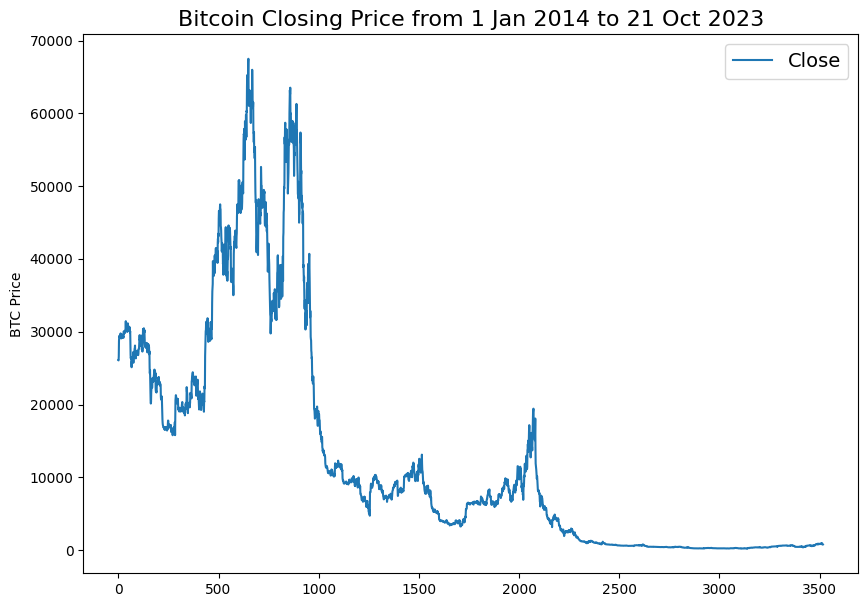

In [8]:
# Visualized our data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Bitcoin Closing Price from 1 Jan 2014 to 21 Oct 2023", fontsize=16)
plt.legend(fontsize=14);

💭 Seem like my plot is backwards and year is very clutered. So let's fix that

In [9]:
# Importing and formatting historical Bitcoin data with python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/bitcoin_2014-01-01_2023-08-20.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[5]))

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2023, 8, 20, 0, 0),
  datetime.datetime(2023, 8, 19, 0, 0),
  datetime.datetime(2023, 8, 18, 0, 0),
  datetime.datetime(2023, 8, 17, 0, 0),
  datetime.datetime(2023, 8, 16, 0, 0),
  datetime.datetime(2023, 8, 15, 0, 0),
  datetime.datetime(2023, 8, 14, 0, 0),
  datetime.datetime(2023, 8, 13, 0, 0),
  datetime.datetime(2023, 8, 12, 0, 0),
  datetime.datetime(2023, 8, 11, 0, 0)],
 [26090.63,
  26058.26,
  26610.04,
  28736.49,
  29200.8,
  29430.95,
  29285.11,
  29430.07,
  29426.01,
  29455.74])

In [10]:
# reserved data
timesteps_r = timesteps[::-1]
btc_price_r = btc_price[::-1]
timesteps_r[:10], btc_price_r[:10]

([datetime.datetime(2014, 1, 2, 0, 0),
  datetime.datetime(2014, 1, 3, 0, 0),
  datetime.datetime(2014, 1, 4, 0, 0),
  datetime.datetime(2014, 1, 5, 0, 0),
  datetime.datetime(2014, 1, 6, 0, 0),
  datetime.datetime(2014, 1, 7, 0, 0),
  datetime.datetime(2014, 1, 8, 0, 0),
  datetime.datetime(2014, 1, 9, 0, 0),
  datetime.datetime(2014, 1, 10, 0, 0),
  datetime.datetime(2014, 1, 11, 0, 0)],
 [771.4,
  802.39,
  818.72,
  859.51,
  933.53,
  953.29,
  802.0,
  842.72,
  846.86,
  868.48])

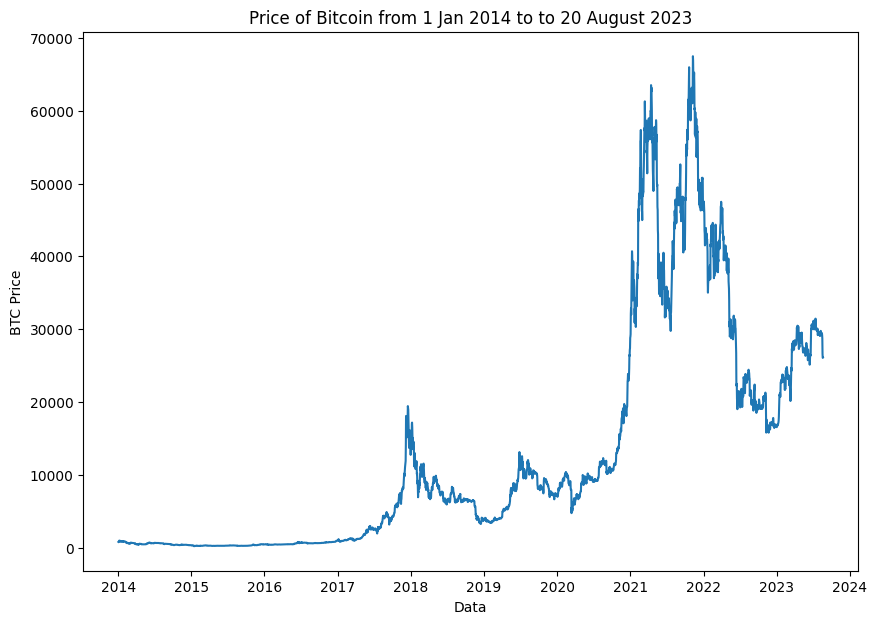

In [11]:
# Plot from csv
plt.figure(figsize=(10, 7))
plt.plot(timesteps_r, btc_price_r)
plt.title("Price of Bitcoin from 1 Jan 2014 to to 20 August 2023")
plt.xlabel("Data")
plt.ylabel("BTC Price");

## Creating Train and test sets for time series data

In [12]:
# Creating dictionary with the reserved columns
d = {'timesteps': timesteps_r , 'price': btc_price_r}

In [13]:
# Create the DataFrame
bitcoin_prices = pd.DataFrame(d)
bitcoin_prices.head()

,timesteps,price
0,2014-01-02,771.40
1,2014-01-03,802.39
2,2014-01-04,818.72
3,2014-01-05,859.51
4,2014-01-06,933.53


In [14]:
# Get our bitcoin data array
timesteps = bitcoin_prices['timesteps'].to_numpy()
prices = bitcoin_prices['price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-01-02T00:00:00.000000000', '2014-01-03T00:00:00.000000000',
        '2014-01-04T00:00:00.000000000', '2014-01-05T00:00:00.000000000',
        '2014-01-06T00:00:00.000000000', '2014-01-07T00:00:00.000000000',
        '2014-01-08T00:00:00.000000000', '2014-01-09T00:00:00.000000000',
        '2014-01-10T00:00:00.000000000', '2014-01-11T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([771.4 , 802.39, 818.72, 859.51, 933.53, 953.29, 802.  , 842.72,
        846.86, 868.48]))

In [15]:
# Wrong way to split  train/test set for time_series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2814,), (704,), (2814,), (704,))

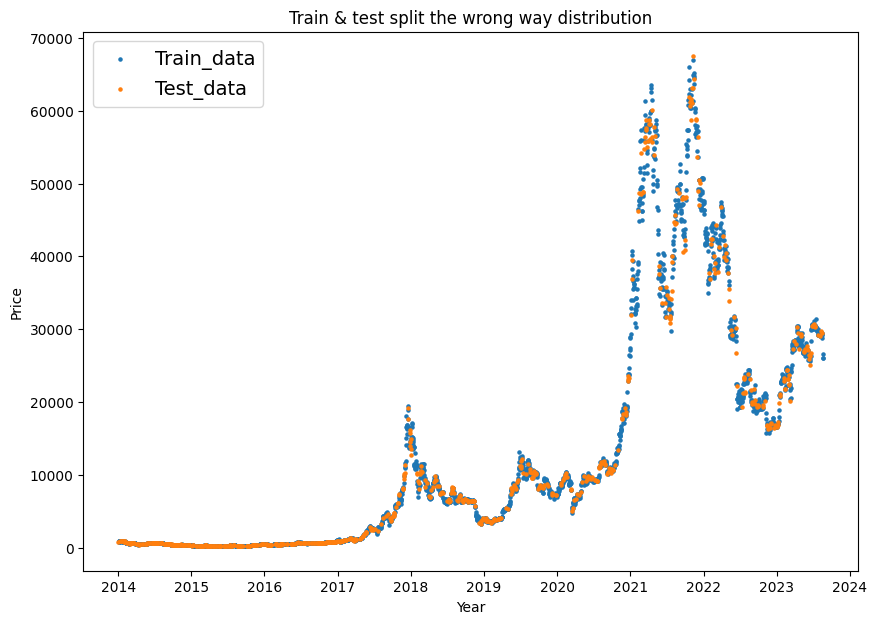

In [16]:
# View our data with pyplot
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train_data")
plt.scatter(X_test, y_test, s=5, label="Test_data")
plt.title("Train & test split the wrong way distribution")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show();

😂 wow this is so wrong , look at how all the data seem very scatter and how will the model learn from this, very impossible and surely very inaccurate result might be gotten

## Create train/test sets for time series (the right way)

![time series train & test sets](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-time-series-train-test-split.png)

In [17]:
# Create train and test split the right way for the series data
split_size = int(0.8 * len(prices))

# Create train data split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2814, 2814, 704, 704)

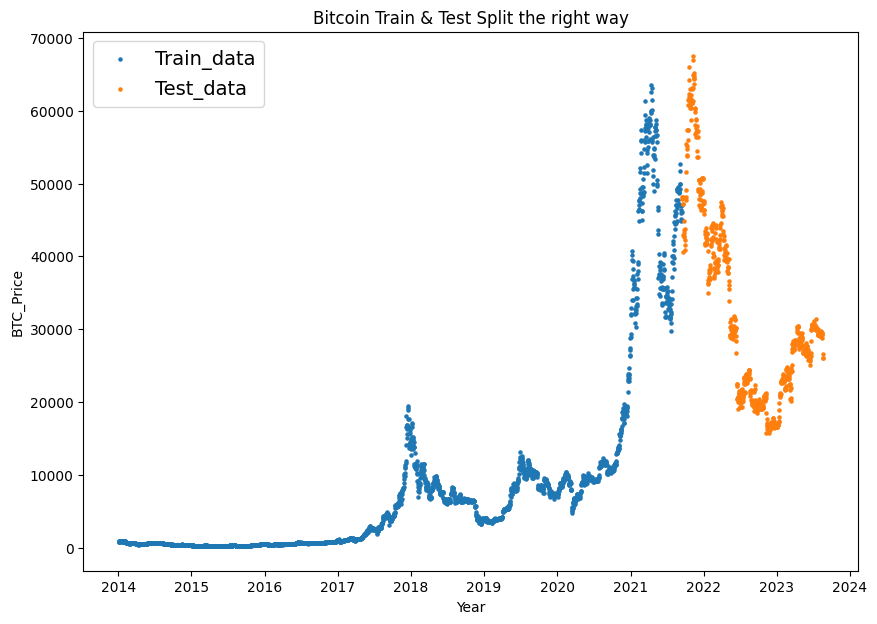

In [18]:
# Let's view our prediction made with correct split
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5,label="Train_data")
plt.scatter(X_test, y_test, s=5, label="Test_data")
plt.title("Bitcoin Train & Test Split the right way")
plt.xlabel("Year")
plt.ylabel("BTC_Price")
plt.legend(fontsize=14);

### Create a plotting function
To ensure we dont repeat writing plot code. let create a function for plot.

In [19]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  plot a timesteps (a series of points in time) against values (a series of values in time)

  Parameters
  --------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timestep)
  end : where to end the plot (setting a value will index from end of timesteps)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

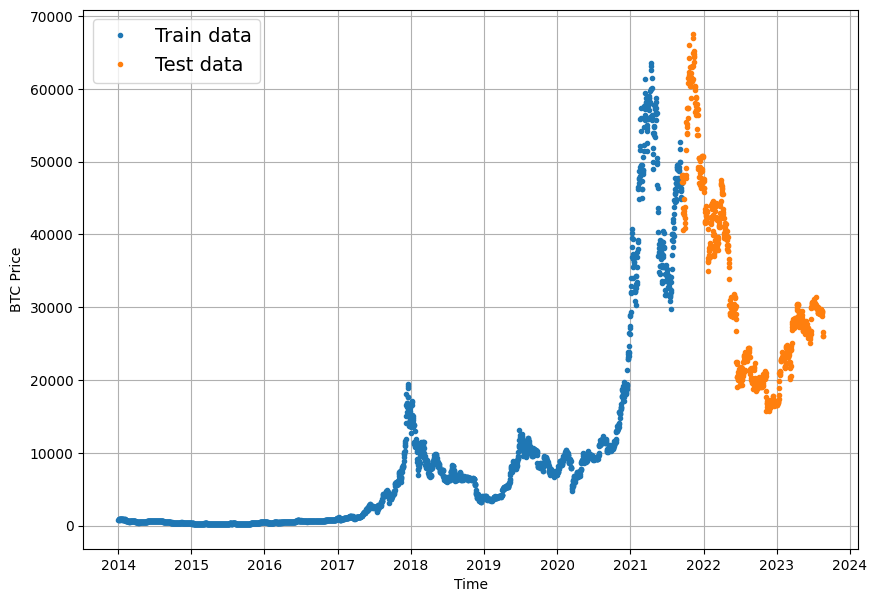

In [20]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Yhh, Fantastical

## Modelling Experiments

✅ Ensure input and outputs shape is correct.

✅ Not all model is useful, and can perform well in production.

✅ Two important term we use are **Horizon** and **Window**
  * **Horizon** = number of timesteps to be predict in future
  * **Window** = number of timesteps used from past to predict **Horizon**.

✅ Example: Predicting the current price(horizon) of Bitcoin with the last 7 days prices of bitcoin(window).

✅Model to be build in the project.

| Model No | Model Type | Horizon Size | Window Size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naive model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA |
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multvariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss function) | 1 | 7 | NA |
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA |
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |

>✅ Start simple first and go as complex as you can go.

>✅ Deep learning is powerful but that doesnt mean its will always work or perform well.

## Model 0: Navie forcast (baseline)

✅ Start with a baseline model (naive model) [naive forcast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method),

✅ it require no training *because* it  uses previous timestep value to predict the next timestep value

✅ Formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep `t` (y-hat) is equal to the value at timestep `t-1` (the previous timestep).

✅ Beating the navie forcast with any kind of model is hard in **open system**





In [21]:
# Create a naive forecast
naive_forecast = y_test[:-1] # Every value except the last value
naive_forecast[:10], naive_forecast[-10:] # first 10 and last 10 values.

(array([48092.9703    , 47816.2504    , 47197.5518    , 48210.7774    ,
        47201.5018    , 42966.0101    , 40538.4344    , 43579.97297675,
        44844.228     , 42748.0353    ]),
 array([29596.9 , 29455.74, 29426.01, 29430.07, 29285.11, 29430.95,
        29200.8 , 28736.49, 26610.04, 26058.26]))

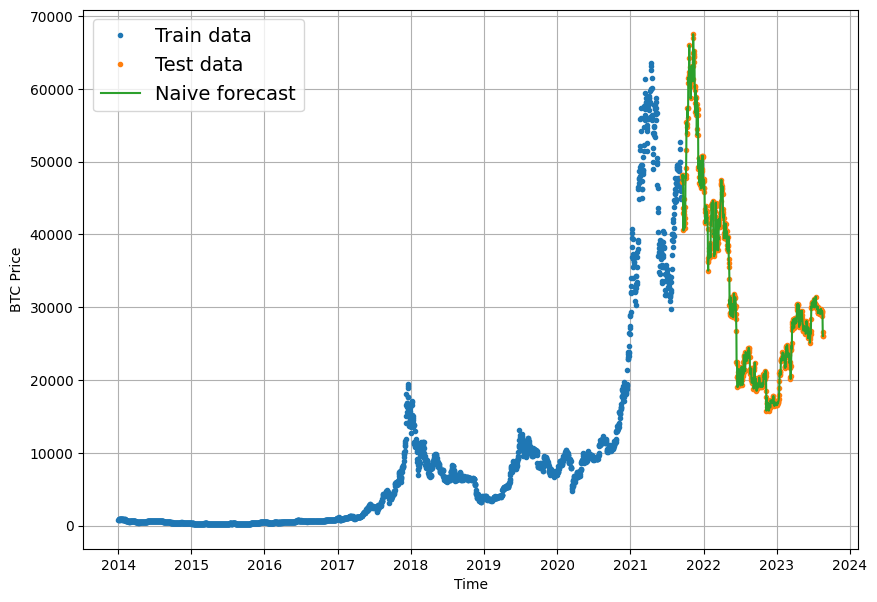

In [22]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

✅ Zoom in 🔭 for better look.

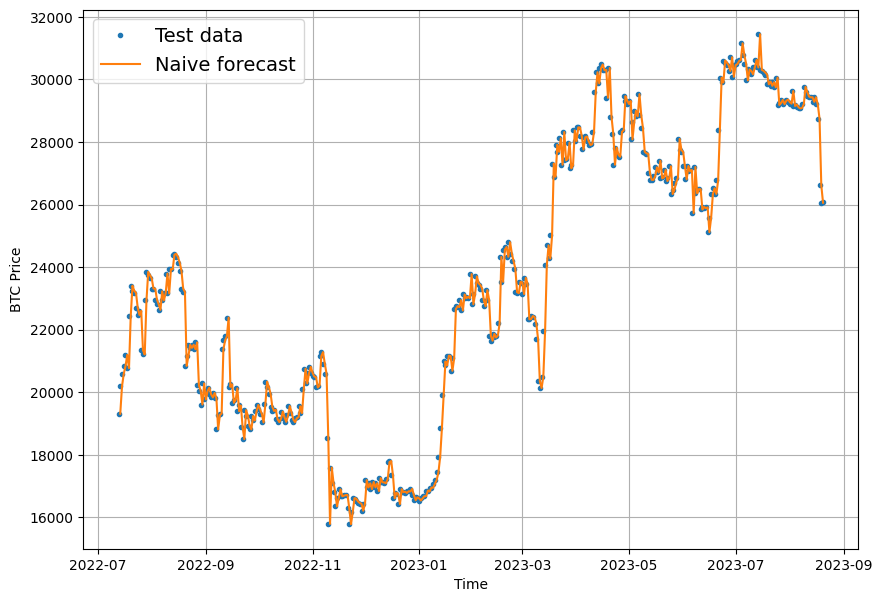

In [23]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast")

✅ Weldone Forcast made 👏. Now Evaluate

## Evaluate Time Series Model

✅Evaluating time series problem is a **regression problem**, using predicting a number, there we can use **regression evaluation metrics**

✅ Our goal is to know **how well our model predicts (`y_pred`) when compared to (`y_true`) (*ground truth values*)**

>📖**Read** [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html) ✅ *Done!*

✅ Evalaution metrics, **lower is better**
 (MAE 0 is better than MAE 100)

 -------

### Scale-dependent errors

Metrics is used to compare time series values and forecasts that are on the same scale e.g (BTC historical prices vs BTC forecast values)

✅ Types are SDE:

**MAE**(mean absolute error)

 `Forecast which minimises the MAE will lead to forecast of the median.`

 [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError)

 **RMSE**(root mean square error)

  `Forecast which minimise the RMSE lead to forecast of the mean.`

  `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`

------

#### Percentage errors

✅ No Units.

✅ Use to compare forecast across different datasets.

✅ Types PE:

**MAPE**(mean absolute percentage error)

`it uses percentage, and does not work if `y=0`.

[`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE)

**sMAPE**(symmtric mean absolute percentage error)

`used mostly in forcasting competitions. and not actual production ` [Forecasting: Principles and Practice](https://otexts.

------

#### Scaled errors

✅ Alternative to percentage errors when compareing different performances of time series.

**MASE** (mean absolute scaled error).

`very close to one`

`Forecast which perfrom better than the naive should get less than <1 MASE.`

[`mase_loss()`](https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16)

In [24]:
# Import Tensorflow
import tensorflow as tf

📌 TensorFlow does not have the MASE(mean absolute scaled error) metric

📌Build one using inspiration from [sktime](https://github.com/alan-turing-institute/sktime)'s (Scikit-Learn for time series) [`MeanAbsoluteScaledError`](https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.performance_metrics.forecasting.MeanAbsoluteScaledError.html#sktime.performance_metrics.forecasting.MeanAbsoluteScaledError) class  

In [25]:
# MASE implemented courtesy of sktime
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonility)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

✅ No use of training data.

If done correctly:

✅ Any naive model should achieve an MASE close to 1 (or very close to 1).

✅ Any worse naive model forecast will achieve MASE > 1.

✅ Any model less < 1 is better.

In [26]:
# Create a function to evaluate predictions
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy()
          }

### LOOKING GOOD!!! 😂 LET"S TEST OUR FUNCTION ON NAIVE FORECAST

In [27]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 694.0382,
 'mse': 1189011.0,
 'rmse': 1090.4178,
 'mape': 2.1232743,
 'mase': 0.9991442}

In [28]:
# Find the average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

31571.82006959122

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

♟️ Let's beat our baseline model

♟️ Try them out as an extra-curriculum.

| **Model/Library Name** | **Resource** |
| ----- | ----- |
| Moving average | https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/ |
| ARIMA (Autoregression Integrated Moving Average) | https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ |
| sktime (Scikit-Learn for time series) | https://github.com/alan-turing-institute/sktime |
| TensorFlow Decision Forests (random forest, gradient boosting trees) | https://www.tensorflow.org/decision_forests |
| Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) | https://github.com/facebookresearch/Kats |
| LinkedIn Greykite (flexible, intuitive and fast forecasts) | https://github.com/linkedin/greykite |

## Format Data Part 2: Windowing

✅ Windowing is a method to turn time series dataset into a **supervised learning problem**

✅ i.e using the past to predict the future

✅ Univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) look likes:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

or for the Bitcoin price, looks like:

```
Window for one week with the target of predicting the next day (Bitcoin prices)

[771.4 , 802.39, 818.72, 859.51, 933.53, 953.29, 802.  , 842.72] -> [846.86]
[802.39, 818.72, 859.51, 933.53, 953.29, 802.  , 842.72, 846.86] -> [868.48]
[818.72, 859.51, 933.53, 953.29, 802.  , 842.72, 846.86, 868.48] -> [913.95]
```
![windows and horizons for turning time series data into a supervised learning problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-time-series-windows-and-horizons.png)

✅Turning time series data into a supervised learing problem.

♟️ Let's build a function which takes in a univariate time series and turn it into windows and horizon of specified sizes.

✅Let's just start with 7 size window and 1 horizon for instance.

In [31]:
prices[:11], prices[:-1]

(array([771.4 , 802.39, 818.72, 859.51, 933.53, 953.29, 802.  , 842.72,
        846.86, 868.48, 913.95]),
 array([  771.4 ,   802.39,   818.72, ..., 28736.49, 26610.04, 26058.26]))

In [32]:
# Setting size
HORIZON = 1
WINDOW_SIZE = 7 # Using a week worth of timesteps to predict the horizon

✅ Now creating a function to take in an array and turn it into a window and horizon.

In [49]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Create labels for windowed dataset.

  E.g if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6]) ✅
  """
  return x[:, :-horizon], x[:, -horizon:]

In [48]:
# x = [1, 2, 3, 4, 5, 6, 7]
# x_ = tf.expand_dims(tf.range(7)+1, axis=0)
# y = x_[:, :-1]
# k = x_[:, -1:]
# y, k
# # y, n = x_[:, :-1], x_[:, -1]
# # y, n  😂✅ Bursted.

In [51]:
# Testing out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(9), axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6 7] -> label: 8


✅ Beautiful

✅ Using [NumPy's array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html). To speed up our workflow, instead of python loops function which is very slow.

✅ Let's create function which:
1. Create a window step of any window size
2. Use Numpy indexing to create 2D multiple window steps
```
2D multiple window
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```
3. Use the 2D array MW ⬆️ to index on target series
4. Use our `get_labelled_windows()` function to turn the window steps into windwo with a specified horizon

> 📖 **Resource** The function created below has been adapted from Syafiq Kamarul Azman's article [*Fast and Robust Sliding Window Vectorization with NumPy*](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).


In [53]:
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turn a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size(add horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  print(f"Window indexes: \n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

* As Ususal let break down our code

In [76]:
# # Breaking down and understanding the function with sample
# x = np.arange(100)
# print(x)
# ws = np.expand_dims(np.arange(7+1), axis=0)
# print(ws)
# wi = ws + np.expand_dims(np.arange(len(x)-(7)), axis=0).T
# np.expand_dims(np.arange(len(x)-()), axis=0)
# print(wi)
# w_a = x[wi]
# print(w_a)
# w, l = get_labelled_windows() ✅Done😂

Waohh! Afew step there...
let's see how it goes

In [77]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes: 
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515],
       [3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516],
       [3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517]]), (3511, 8))


(3511, 3511)

In [85]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [771.4  802.39 818.72 859.51 933.53 953.29 802.  ] -> Label: [842.72]
Window: [802.39 818.72 859.51 933.53 953.29 802.   842.72] -> Label: [846.86]
Window: [818.72 859.51 933.53 953.29 802.   842.72 846.86] -> Label: [868.48]


In [79]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: f{full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: f[29455.74 29426.01 29430.07 29285.11 29430.95 29200.8  28736.49] -> Label: [26610.04]
Window: f[29426.01 29430.07 29285.11 29430.95 29200.8  28736.49 26610.04] -> Label: [26058.26]
Window: f[29430.07 29285.11 29430.95 29200.8  28736.49 26610.04 26058.26] -> Label: [26090.63]


✅ What will did was? we took an array and returns a windowed dataset.

♟️ **Note:** Similiar results can be achieved using the [`tf.keras.preprocessing.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array).

💭Just like ours but also returns data in the from of a tf.data Dateset instance(we'll see that later)

## Turning windows into training and test sets

😂 Sistine chapel jokes

✅Turn our windows into training and test splits.

✅Although we can windowed our already training and test splits data.
 A *Correct windowing* involves offset at some point in the data, therefore we window data first and then split it into training and test set.

✅ Creating a function that takes the full set of windows and their labels and split them into train and test splits.



In [82]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Split matching pair of windows and labels into training and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # 80% of train data
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

Look at that amazing function, let's test it.

In [83]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2808, 703, 2808, 703)

✅80% splits of training data and 20% of test data

♟️How do they look like?

In [84]:
train_windows[:5], train_labels[:5]

(array([[771.4 , 802.39, 818.72, 859.51, 933.53, 953.29, 802.  ],
        [802.39, 818.72, 859.51, 933.53, 953.29, 802.  , 842.72],
        [818.72, 859.51, 933.53, 953.29, 802.  , 842.72, 846.86],
        [859.51, 933.53, 953.29, 802.  , 842.72, 846.86, 868.48],
        [933.53, 953.29, 802.  , 842.72, 846.86, 868.48, 913.95]]),
 array([[842.72],
        [846.86],
        [868.48],
        [913.95],
        [863.22]]))

In [88]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [91]:
train_labels, y_train, len(train_labels), len(y_train)

(array([[  842.72      ],
        [  846.86      ],
        [  868.48      ],
        ...,
        [44990.02141159],
        [47012.9104    ],
        [48092.9703    ]]),
 array([  771.4       ,   802.39      ,   818.72      , ...,
        46058.0015    , 44990.02141159, 47012.9104    ]),
 2808,
 2814)

In [98]:
train_labels[:-1], y_train[8:]

(array([[  842.72      ],
        [  846.86      ],
        [  868.48      ],
        ...,
        [46058.0015    ],
        [44990.02141159],
        [47012.9104    ]]),
 array([  846.86      ,   868.48      ,   913.95      , ...,
        46058.0015    , 44990.02141159, 47012.9104    ]))

In [105]:
# checking data
train_labels[:-1], y_train[8:]

(array([[  842.72      ],
        [  846.86      ],
        [  868.48      ],
        ...,
        [46058.0015    ],
        [44990.02141159],
        [47012.9104    ]]),
 array([  846.86      ,   868.48      ,   913.95      , ...,
        46058.0015    , 44990.02141159, 47012.9104    ]))

## Make a modelling checkpoint

✅ Since model performance will fluctuate from experiment to experiment, we ensure we compare them apple to apples.😂

✅i.e best performance vs best performance per model.

📌 If `model_1` performed well on epoch 55 but its performance feel off toward epoch 100, we want the version of the model from epoch 55 to compare to other model rather than the version of model from epoch 100. 👍

✅ Same for other model. compare the best against the best.😂😂

✅ "To Do this"  we'll implement a [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback.

✅ `ModelCheckpoint` callback will monitor model performance during training and save the best model to file by setting `save_best_only=True`

✅ Ensuring we can returns it to it best performining configuration from file.

> 📌 Since size of dataset is smaller than usual, we are going to notice modelling experiment result fluctuate quite a bit during training(hence the implementation of the `ModelCheckpoint` callback to save the best model).

✅ Because we are running multiple experiments, its important to keep track of them by saving model file under different names.

✅ we ensure we write a small function to create a `ModelCheckpoint` callback  which save a model to specified filename

In [107]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                             save_best_only=True) # save only the best model to file

## Model 1: Dense model (window = 7, horizon=1)

Finally!